Amsterdam, North Holland, The Netherlands
12 December, 2023

Importing libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [30]:
df = pd.read_csv('listings.csv')

Exploration the Dataset

In [31]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.90 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3,365,2023-11-27,2.04,1,0,51,0363 5F3A 5684 6750 D14D
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,117.0,1,366,2023-12-10,2.18,2,168,30,0363 CBB3 2C10 0C2A 1E29
2,27886,Houseboat in Amsterdam · ★4.93 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155.0,3,267,2023-11-19,1.84,1,175,24,0363 974D 4986 7411 88D8
3,28871,Rental unit in Amsterdam · ★4.87 · 1 bedroom ·...,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,79.0,2,569,2023-12-10,3.51,2,0,116,0363 607B EA74 0BD8 2F6F
4,29051,Rental unit in Amsterdam · ★4.81 · 1 bedroom ·...,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,698,2023-12-08,4.50,2,91,97,0363 607B EA74 0BD8 2F6F


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8739 non-null   int64  
 1   name                            8739 non-null   object 
 2   host_id                         8739 non-null   int64  
 3   host_name                       8739 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8739 non-null   object 
 6   latitude                        8739 non-null   float64
 7   longitude                       8739 non-null   float64
 8   room_type                       8739 non-null   object 
 9   price                           8443 non-null   float64
 10  minimum_nights                  8739 non-null   int64  
 11  number_of_reviews               8739 non-null   int64  
 12  last_review                     78

In [33]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.739000e+03,8.739000e+03,0.0,8739.000000,8739.000000,8443.000000,8739.000000,8739.000000,7817.000000,8739.00000,8739.000000,8739.000000
mean,3.448635e+17,1.095547e+08,NaN,52.366514,4.889732,251.160725,4.138803,45.042453,1.093275,1.73212,80.523630,10.475569
std,4.181954e+17,1.473164e+08,NaN,0.017253,0.035585,421.177934,17.108464,110.191857,2.305930,2.52209,112.853876,30.015613
min,2.818000e+03,3.159000e+03,NaN,52.290340,4.755870,10.000000,1.000000,0.000000,0.010000,1.00000,0.000000,0.000000
25%,1.957993e+07,1.058756e+07,NaN,52.355490,4.864860,144.000000,2.000000,3.000000,0.260000,1.00000,0.000000,0.000000
50%,4.553979e+07,3.725295e+07,NaN,52.365640,4.887550,200.000000,3.000000,9.000000,0.530000,1.00000,16.000000,3.000000
75%,7.911577e+17,1.454343e+08,NaN,52.376330,4.908849,297.000000,4.000000,35.000000,1.080000,1.00000,132.000000,7.000000
max,1.043564e+18,5.503263e+08,NaN,52.425159,5.026669,25457.000000,1001.000000,3528.000000,117.730000,22.00000,365.000000,1632.000000


In [34]:
df.shape

(8739, 18)

Checking the Duplicate and Missing Values in the Dataset

In [35]:
df.duplicated().sum()

0

In [36]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8739
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              296
minimum_nights                       0
number_of_reviews                    0
last_review                        922
reviews_per_month                  922
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             78
dtype: int64

Cleaning the Data

In [37]:
# Dropping Unnecessary Columns
df_cleaned = df.drop(columns= ['id', 'name', 'host_id', 'neighbourhood_group', 'latitude', 'longitude', 'last_review', 'license'])
df_cleaned.head()

,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Daniel,Oostelijk Havengebied - Indische Buurt,Private room,69.0,3,365,2.04,1,0,51
1,Alexander,Centrum-Oost,Private room,117.0,1,366,2.18,2,168,30
2,Flip,Centrum-West,Private room,155.0,3,267,1.84,1,175,24
3,Edwin,Centrum-West,Private room,79.0,2,569,3.51,2,0,116
4,Edwin,Centrum-Oost,Private room,59.0,2,698,4.50,2,91,97


In [38]:
df_cleaned.shape

(8739, 10)

Handling Missing Data

In [39]:
# Removing rows with missing price value
df_cleaned = df_cleaned.dropna(subset=['price'])
df_cleaned.isnull().sum()

host_name                           0
neighbourhood                       0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 789
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

In [40]:
# Filling missing values with the mean
df_cleaned['reviews_per_month'].fillna(df_cleaned['reviews_per_month'].mean(), inplace=True)
df_cleaned.isnull().sum()

host_name                         0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Exploratory Data Analysis (EDA)

<AxesSubplot:>

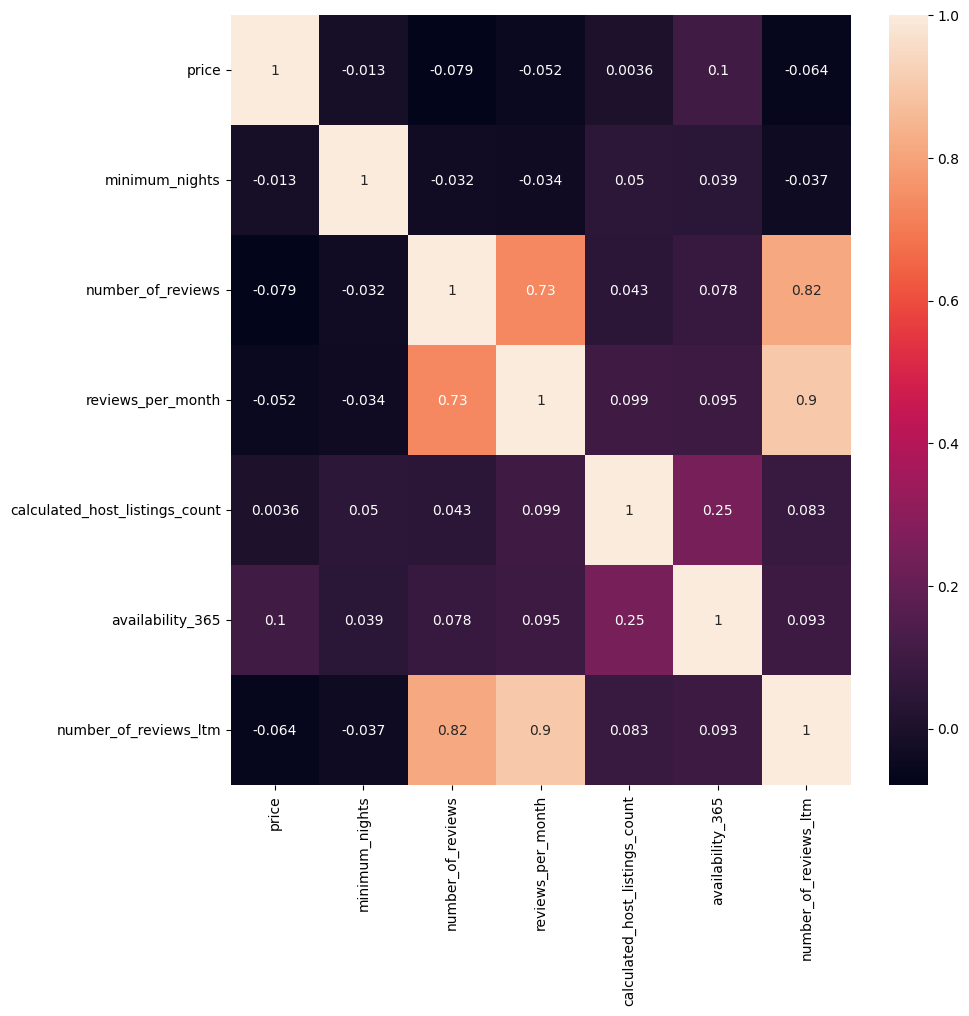

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned.corr(), annot=True)

In [42]:
# Dropping highly correlated columns
df_cleaned.drop(columns= ['number_of_reviews', 'reviews_per_month'], inplace=True)
df_cleaned.info() , df_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8443 entries, 0 to 8738
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       8443 non-null   object 
 1   neighbourhood                   8443 non-null   object 
 2   room_type                       8443 non-null   object 
 3   price                           8443 non-null   float64
 4   minimum_nights                  8443 non-null   int64  
 5   calculated_host_listings_count  8443 non-null   int64  
 6   availability_365                8443 non-null   int64  
 7   number_of_reviews_ltm           8443 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 593.6+ KB


(None, (8443, 8))

<AxesSubplot:ylabel='number_of_reviews_ltm'>

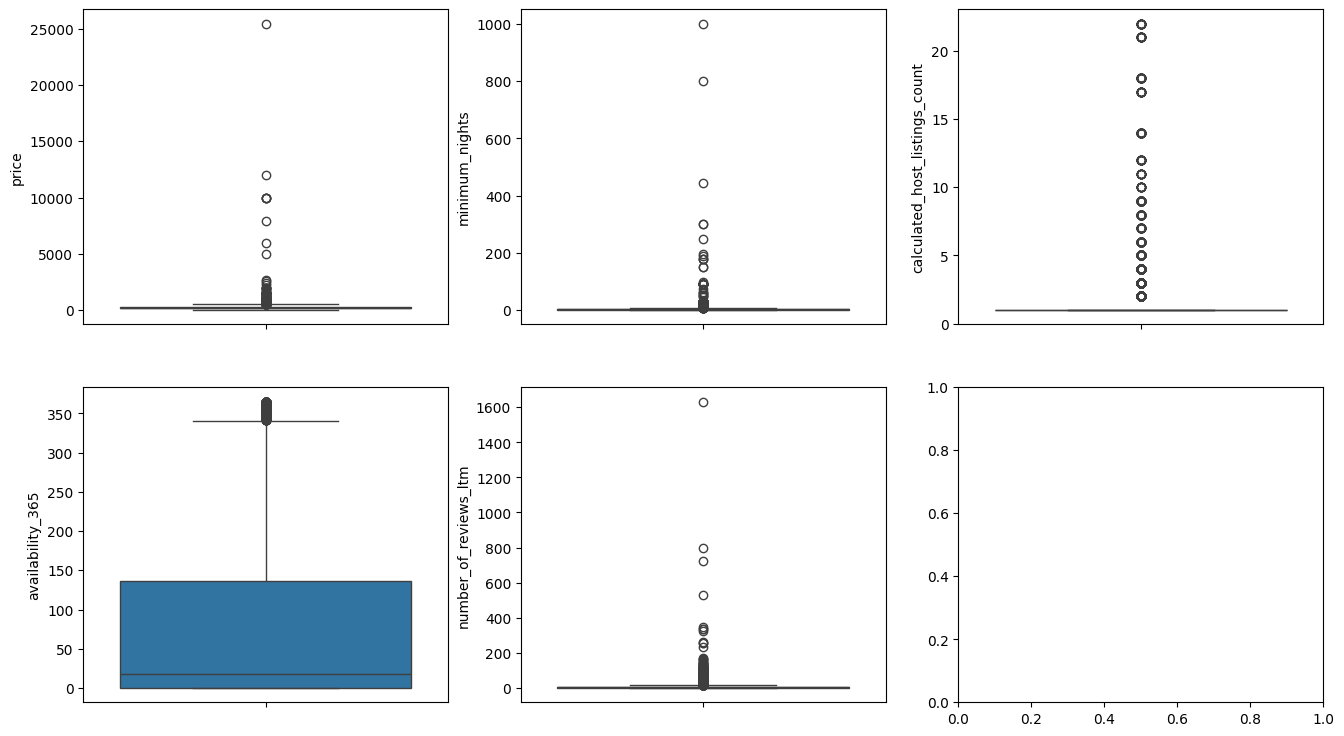

In [43]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,9))

sns.boxplot(df_cleaned['price'], ax=axes[0][0])
sns.boxplot(df_cleaned['minimum_nights'], ax=axes[0][1])
sns.boxplot(df_cleaned['calculated_host_listings_count'], ax=axes[0][2])
sns.boxplot(df_cleaned['availability_365'], ax=axes[1][0])
sns.boxplot(df_cleaned['number_of_reviews_ltm'], ax=axes[1][1])

In [44]:
df_cleaned['price'].value_counts()

200.0    358
250.0    332
300.0    270
150.0    260
350.0    181
        ... 
503.0      1
530.0      1
417.0      1
377.0      1
870.0      1
Name: price, Length: 613, dtype: int64

In [45]:
# Function to remove the outliers
def remove_outliers(df, column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    new_df_cap = df.copy()
    
    new_df_cap[column] = np.where(
        new_df_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[column] < lower_limit,
            lower_limit,
            new_df_cap[column]
        )
    )
    
    return new_df_cap[column]

<AxesSubplot:ylabel='availability_365'>

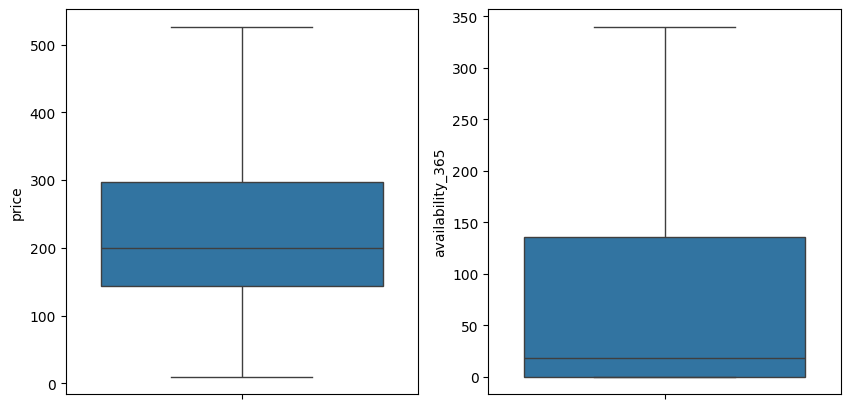

In [51]:
# Removing Outliers
df_cleaned['price'] = remove_outliers(df_cleaned, 'price')
df_cleaned['availability_365'] = remove_outliers(df_cleaned, 'availability_365')

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.boxplot(df_cleaned['price'], ax=axes[0])
sns.boxplot(df_cleaned['availability_365'], ax=axes[1])

<AxesSubplot:xlabel='room_type', ylabel='count'>

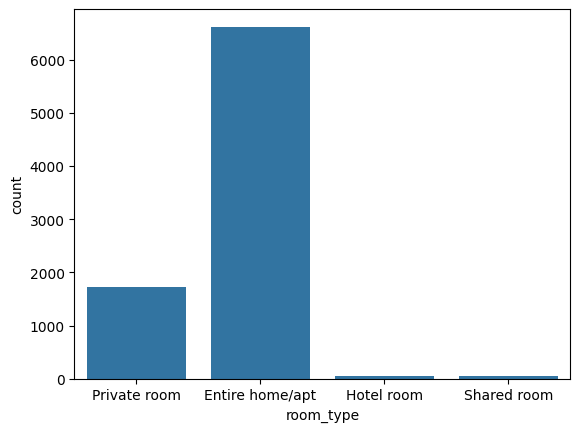

In [52]:
sns.countplot(data=df_cleaned, x='room_type')

In [64]:
df_cleaned['room_type'].value_counts()

Entire home/apt    6617
Private room       1730
Hotel room           52
Shared room          44
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='price'>

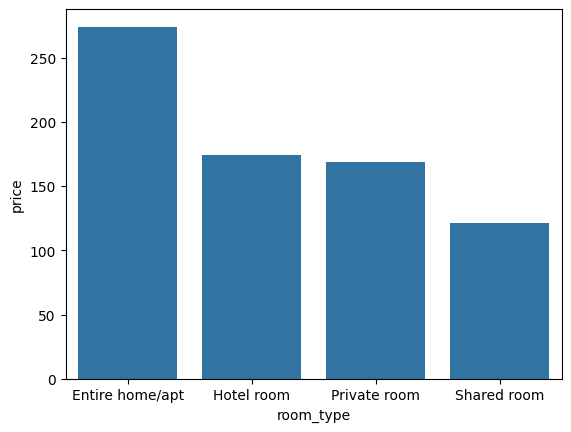

In [56]:
room_type_prices = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

sns.barplot(x=room_type_prices.index, y=room_type_prices)

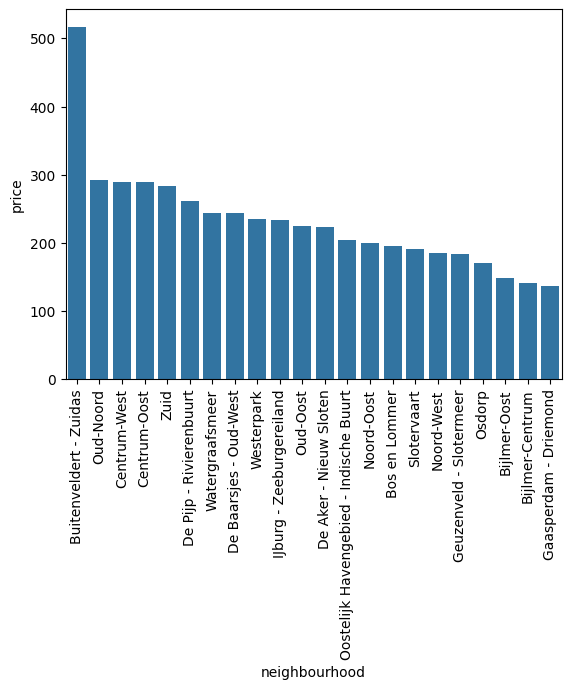

In [62]:
neighbourhood_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

sns.barplot(x=neighbourhood_prices.index, y=neighbourhood_prices)
plt.xticks(rotation=90)
plt.show()

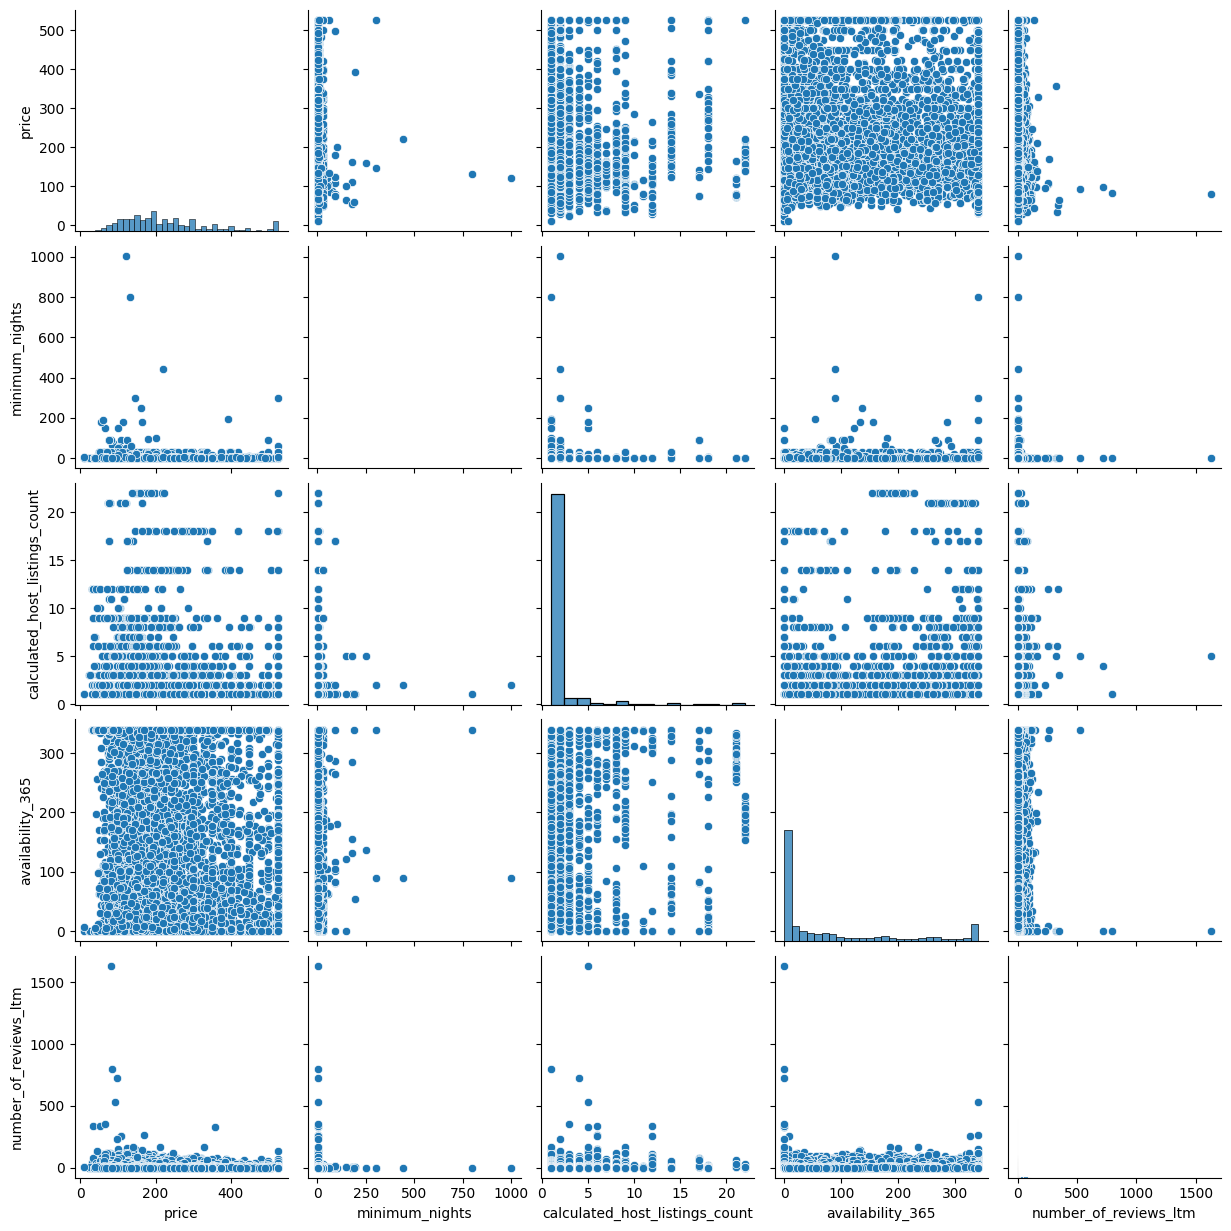

In [66]:
sns.pairplot(df_cleaned)

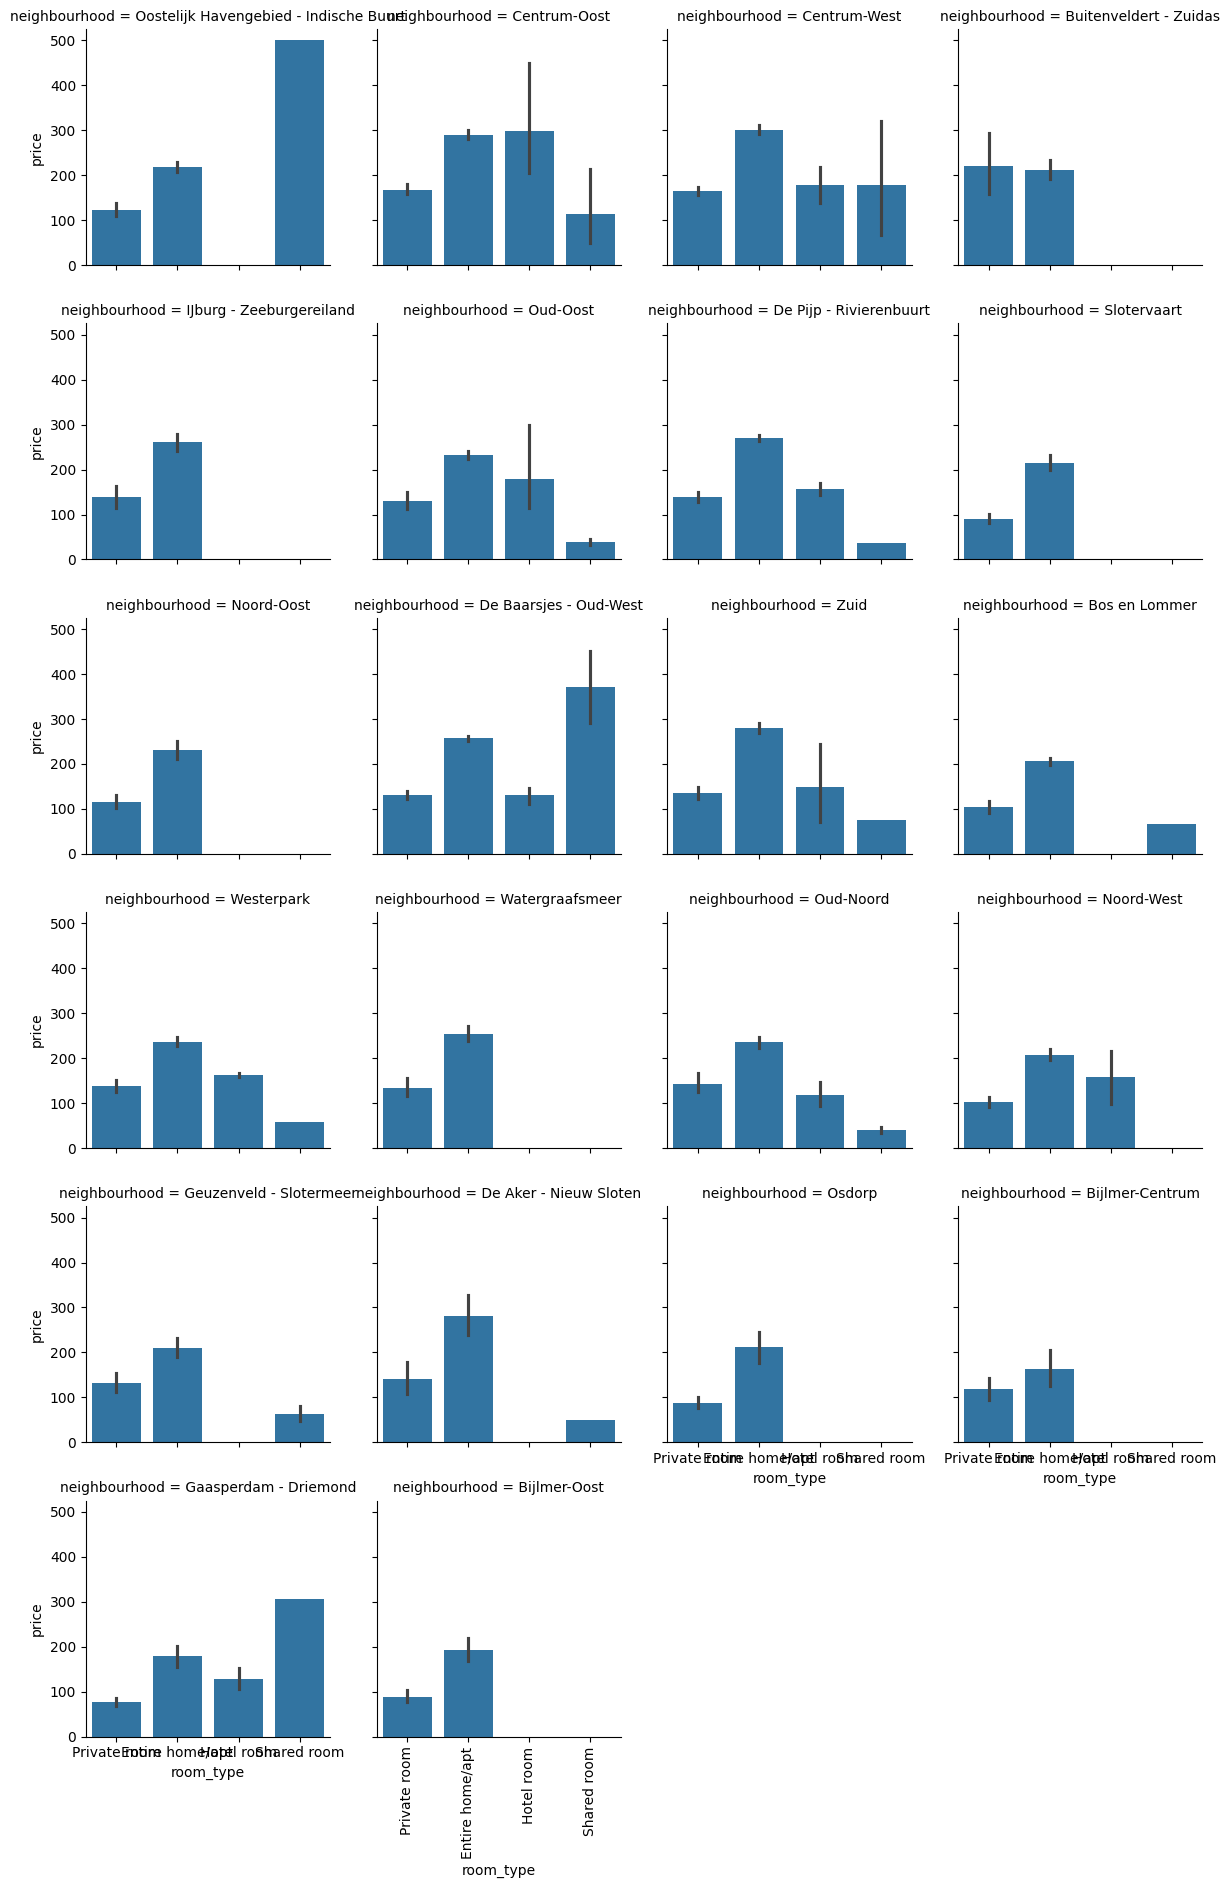

In [71]:
sns.catplot(x='room_type', y='price', col='neighbourhood', data=df_cleaned, kind='bar', col_wrap=4, height=3)
plt.xticks(rotation=90)
plt.show()